In [1]:
# import IPython as ipy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def core_info(df):
    print('Info about dataset: ')
    print(df.info())
    print('\n')
    print('Shape')
    print(df.shape)
    print('\n')
    print('description: ')
    print(df.describe())
    print('\n')
    print('Top 2 rows')
    print(df.head(2))

In [3]:
def pairwise_plot_with_regline(df, features ,response, degree = 1):
    for feature in features:
        if feature != response:
            plt.scatter(x=feature, y=response, data=df, facecolors='None', edgecolors='k', alpha=.5) 
            sns.regplot(x=feature, y=response, data=df, ci=None, scatter=False, color='orange', order=degree)
            plt.show()

In [4]:
def boxplot_categorical(df, features ,response):
    for feature in features:
        if feature != response:
            sns.boxplot(feature,response, data=df, orient='v')
            plt.show()

In [5]:
def boxplot_boolean_response(df, features ,response):
    for feature in features:
        if feature != response:
            sns.boxplot(response,feature, data=df, orient='v')
            plt.show()

In [6]:
def missing_values_table(df):    
    mis_val = df.isnull().sum()    
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

# Advertising Dataset

In [7]:
advertising = pd.read_csv('Data/Advertising.csv', usecols=[1,2,3,4])
core_info(advertising)

Info about dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB
None


Shape
(200, 4)


description: 
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


Top 2 rows
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4


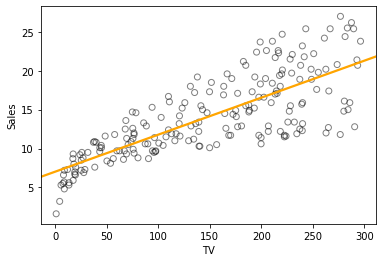

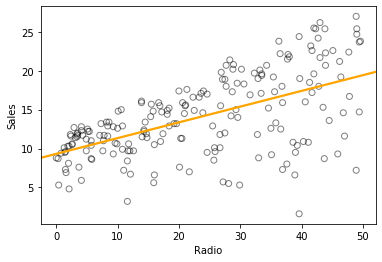

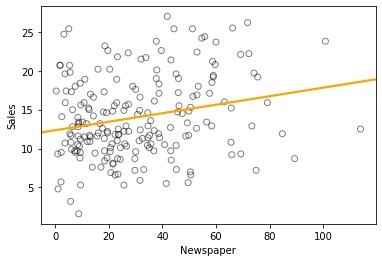

In [8]:
advertising_continuous_features = ['TV', 'Radio', 'Newspaper']
pairwise_plot_with_regline(advertising, advertising_continuous_features, 'Sales')

In [9]:
missing_values_table(advertising)

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

# Auto Dataset

In [10]:
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
# auto = pd.read_csv('Data/Auto.csv')
# auto[auto['horsepower'].str.contains('\?')]
core_info(auto)

Info about dataset: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB
None


Shape
(392, 9)


description: 
              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000 

In [11]:
# auto.horsepower.fillna(auto.horsepower.mean(), inplace=True)
auto.fillna(auto.mean(), inplace=True)
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

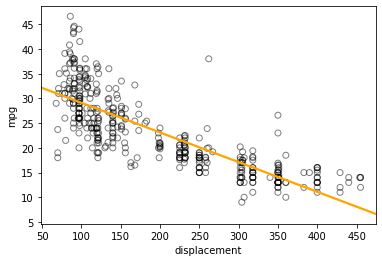

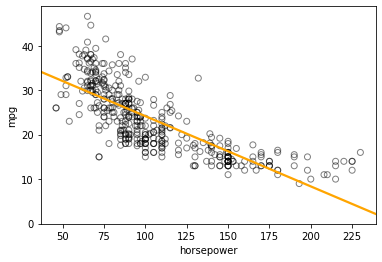

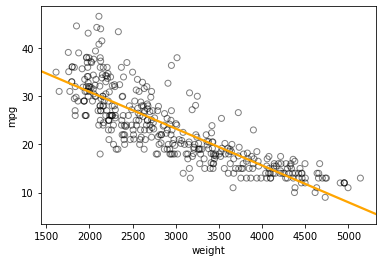

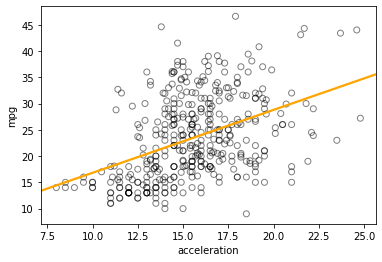

In [12]:
auto_continuous_features = ['displacement', 'horsepower', 'weight', 'acceleration' ]
pairwise_plot_with_regline(auto, auto_continuous_features, 'mpg')

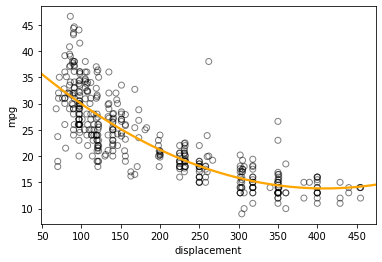

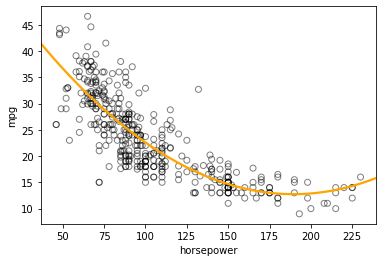

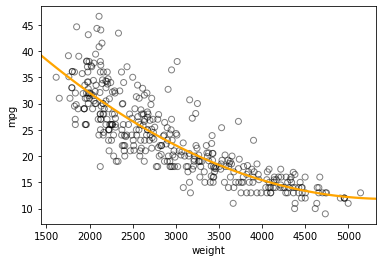

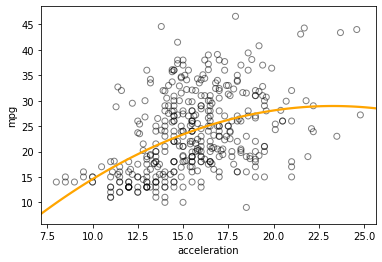

In [13]:
auto_continuous_features = ['displacement', 'horsepower', 'weight', 'acceleration' ]
pairwise_plot_with_regline(auto, auto_continuous_features, 'mpg', degree=2)

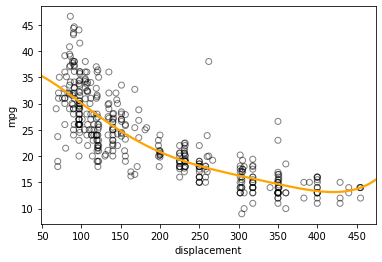

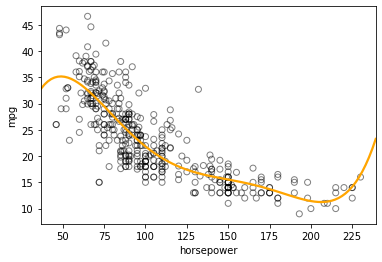

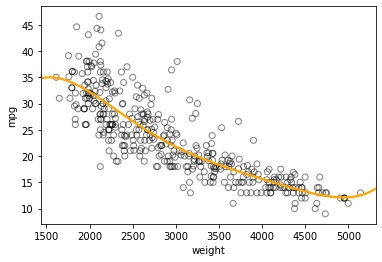

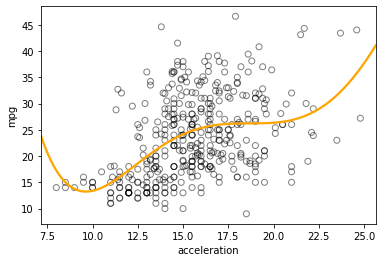

In [14]:
auto_continuous_features = ['displacement', 'horsepower', 'weight', 'acceleration' ]
pairwise_plot_with_regline(auto, auto_continuous_features, 'mpg', degree=5)

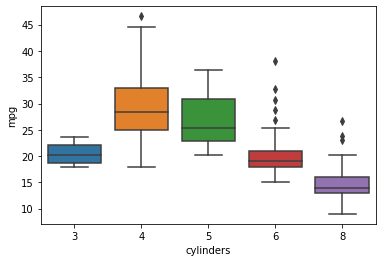

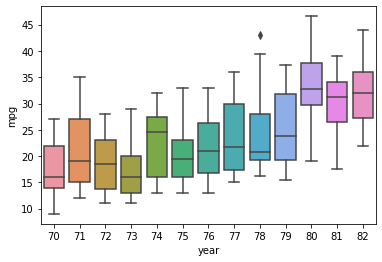

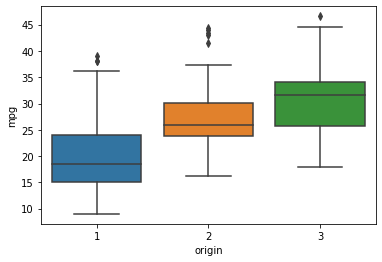

In [14]:
auto_discrete_features = ['cylinders', 'year', 'origin']
boxplot_categorical(auto, auto_discrete_features, 'mpg')

# Boston Dataset

In [20]:
boston = pd.read_csv('Data/Boston.csv')
core_info(boston)

Info about dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


Shape
(506, 14)


description: 
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320

In [21]:
# boston.lstat.nunique()

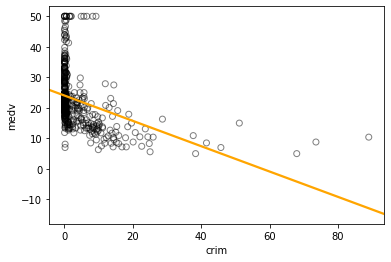

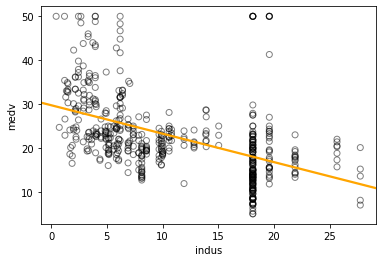

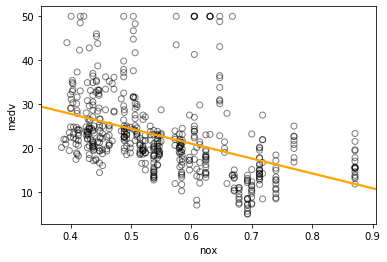

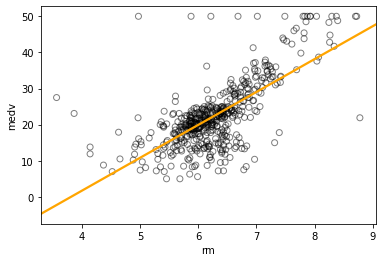

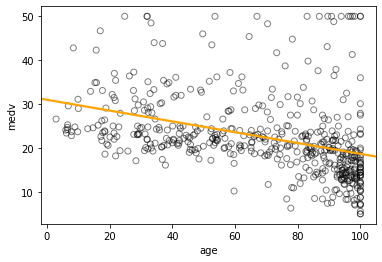

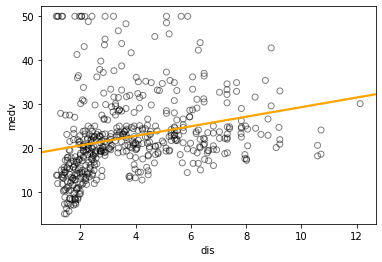

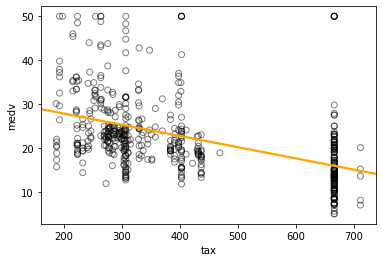

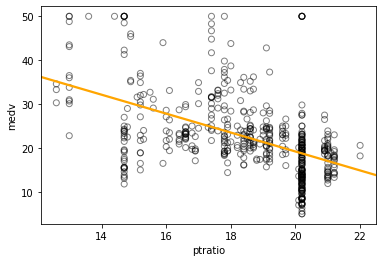

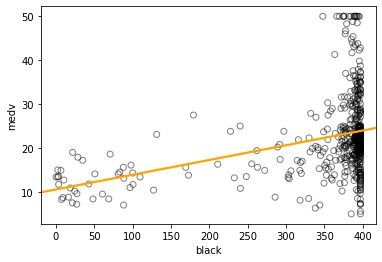

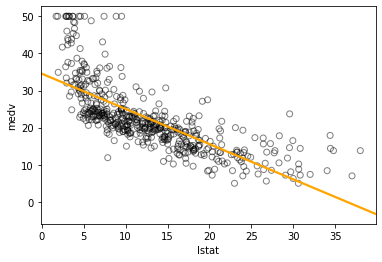

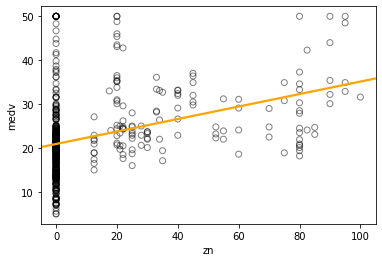

In [22]:
boston_continuous_features = ['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'black', 'lstat', 'zn']
pairwise_plot_with_regline(boston, features=boston_continuous_features, response='medv', degree=1)

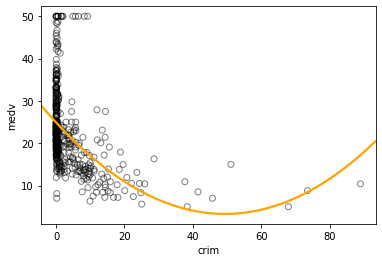

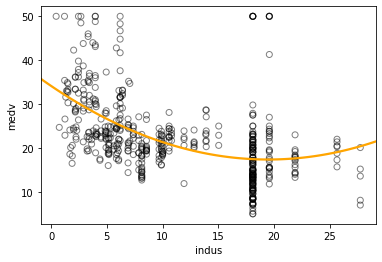

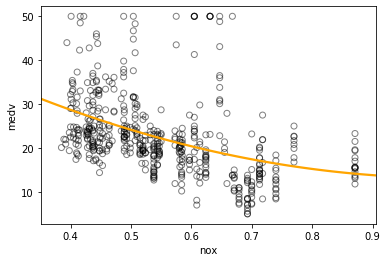

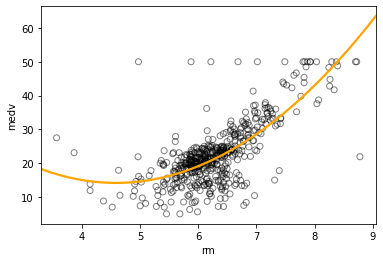

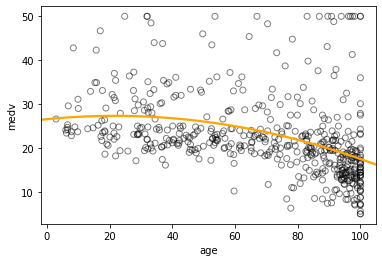

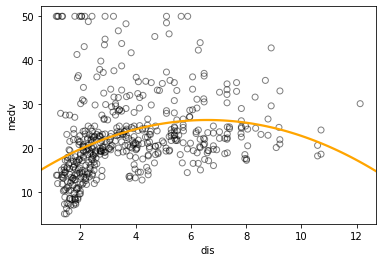

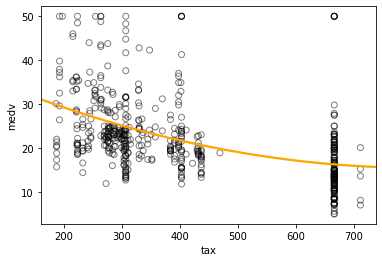

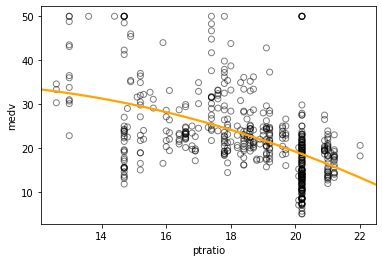

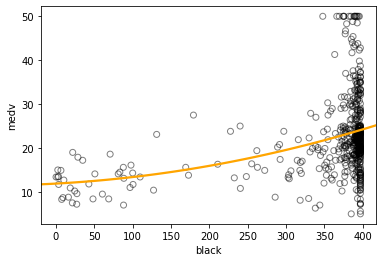

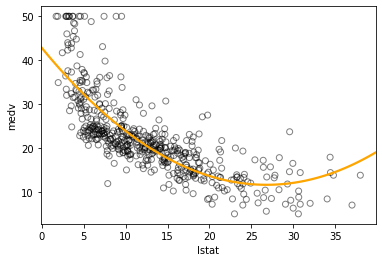

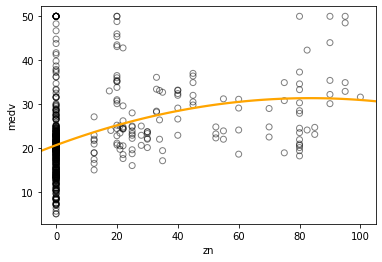

In [23]:
pairwise_plot_with_regline(boston, features=boston_continuous_features, response='medv', degree=2)

In [24]:
boston

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [25]:
# pairwise_plot_with_regline(boston, features=boston_continuous_features, response='medv', degree=5)

In [26]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [27]:
boston['rad']

0      1
1      2
2      2
3      3
4      3
      ..
501    1
502    1
503    1
504    1
505    1
Name: rad, Length: 506, dtype: int64

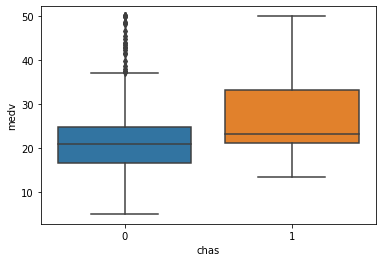

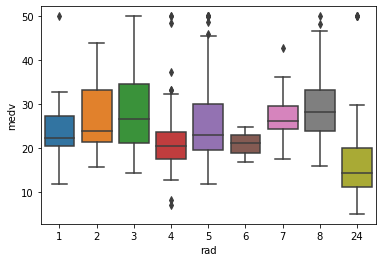

In [22]:
boston_discrete_features = ['chas', 'rad']
boxplot_categorical(df=boston, features=boston_discrete_features , response='medv')

# Caravan

In [29]:
caravan = pd.read_csv('Data/Caravan.csv')
core_info(caravan)

Info about dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 87 columns):
Unnamed: 0    5822 non-null int64
MOSTYPE       5822 non-null int64
MAANTHUI      5822 non-null int64
MGEMOMV       5822 non-null int64
MGEMLEEF      5822 non-null int64
MOSHOOFD      5822 non-null int64
MGODRK        5822 non-null int64
MGODPR        5822 non-null int64
MGODOV        5822 non-null int64
MGODGE        5822 non-null int64
MRELGE        5822 non-null int64
MRELSA        5822 non-null int64
MRELOV        5822 non-null int64
MFALLEEN      5822 non-null int64
MFGEKIND      5822 non-null int64
MFWEKIND      5822 non-null int64
MOPLHOOG      5822 non-null int64
MOPLMIDD      5822 non-null int64
MOPLLAAG      5822 non-null int64
MBERHOOG      5822 non-null int64
MBERZELF      5822 non-null int64
MBERBOER      5822 non-null int64
MBERMIDD      5822 non-null int64
MBERARBG      5822 non-null int64
MBERARBO      5822 non-null int64
MSKA          5822 non

In [30]:
caravan.select_dtypes(include='object').sort_values(by = 'Purchase')

Purchase
0          No
3825       No
3824       No
3823       No
3821       No
...       ...
5558      Yes
3476      Yes
3360      Yes
4421      Yes
3309      Yes

[5822 rows x 1 columns]

In [38]:
caravan.Purchase

0        No
1        No
2        No
3        No
4        No
       ... 
5817     No
5818     No
5819    Yes
5820     No
5821     No
Name: Purchase, Length: 5822, dtype: object

In [41]:
# pd.get_dummies(caravan.Purchase)

In [39]:
caravan.Purchase = caravan.Purchase.factorize()[0]

In [40]:
caravan.Purchase

0       0
1       0
2       0
3       0
4       0
       ..
5817    0
5818    0
5819    1
5820    0
5821    0
Name: Purchase, Length: 5822, dtype: int64

In [42]:
caravan.drop(columns=['Unnamed: 0'], inplace=True)

In [27]:
# caravan.nunique()

In [45]:
# caravan.loc[:, caravan.apply(lambda x: x.nunique()) <= 10].shape

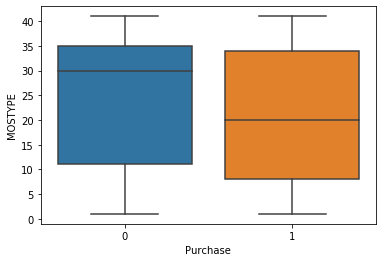

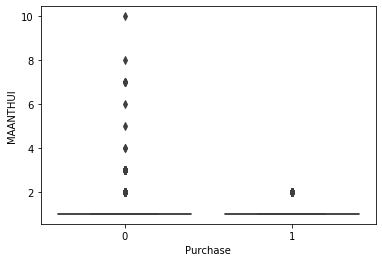

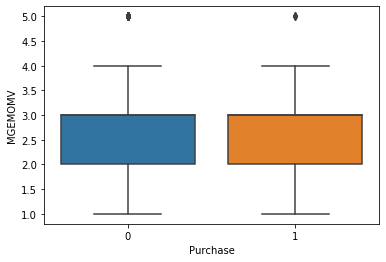

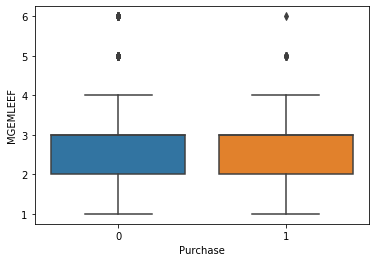

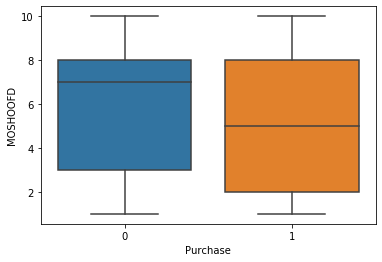

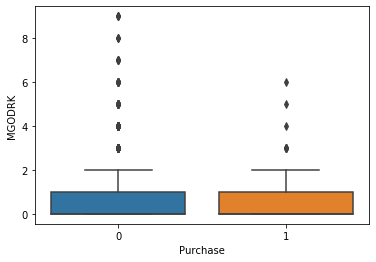

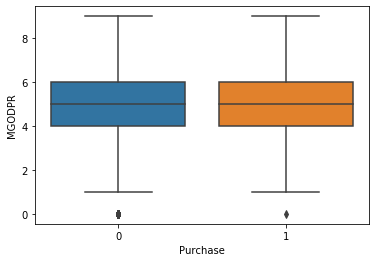

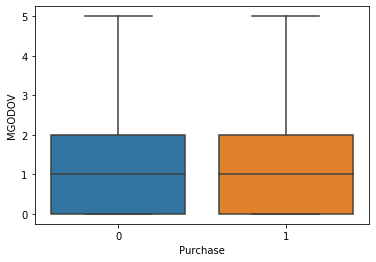

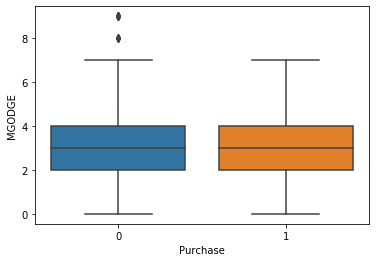

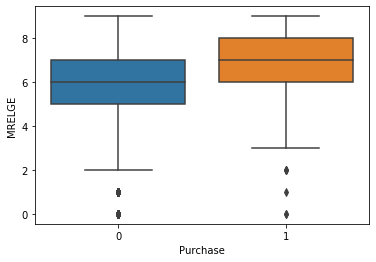

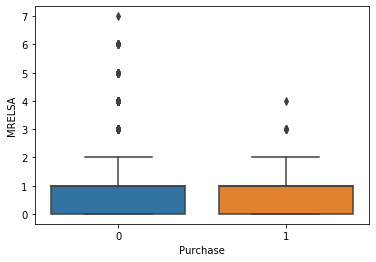

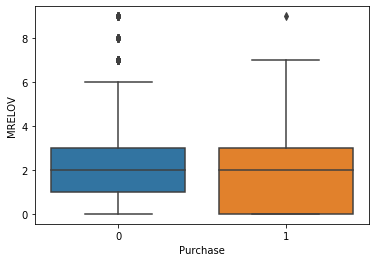

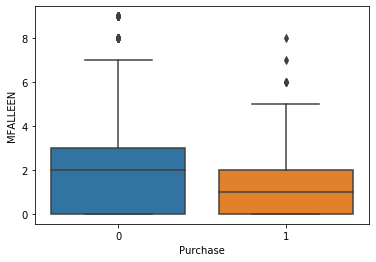

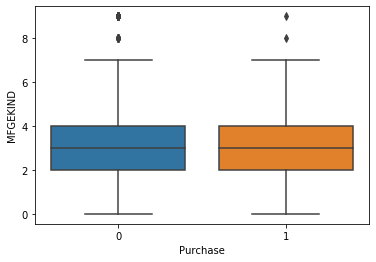

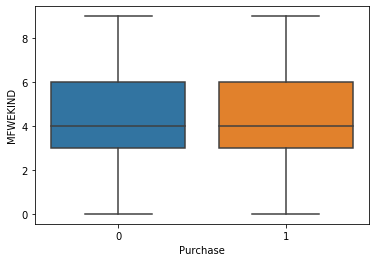

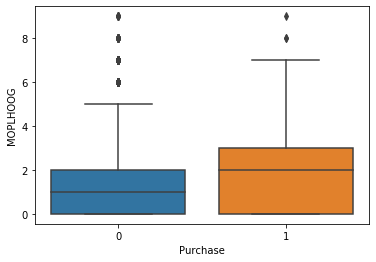

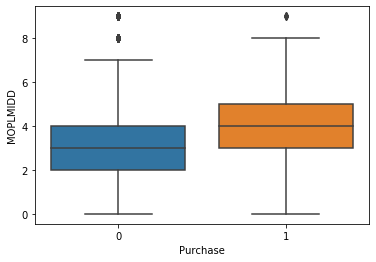

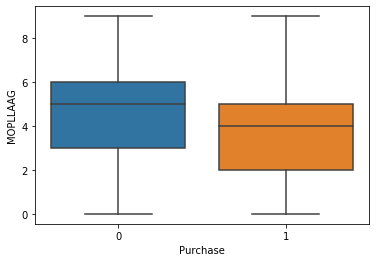

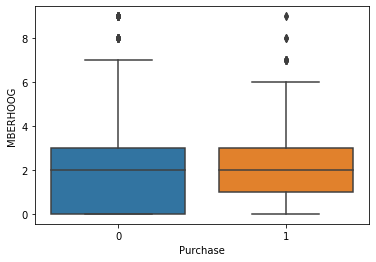

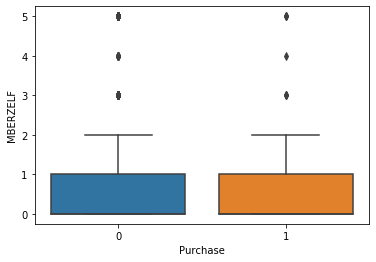

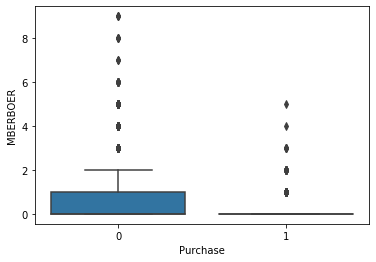

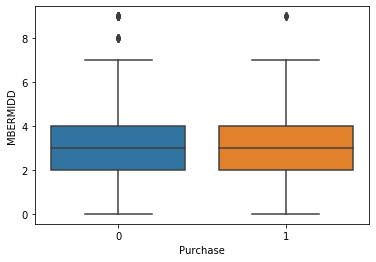

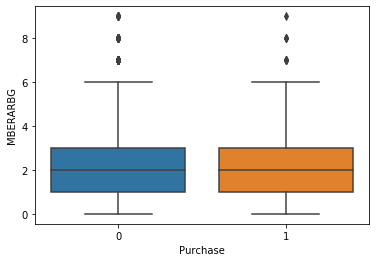

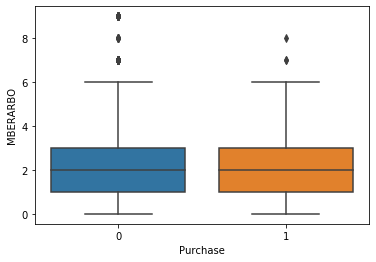

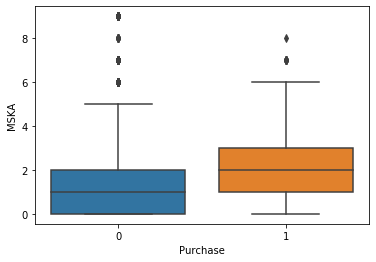

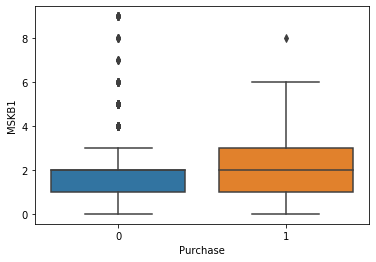

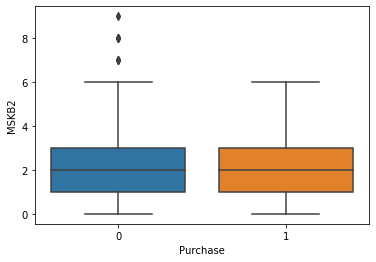

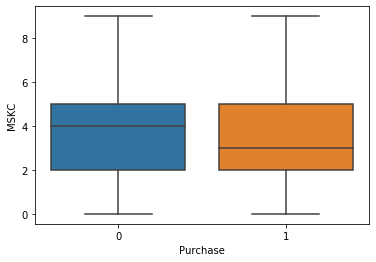

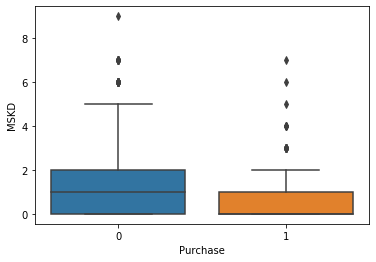

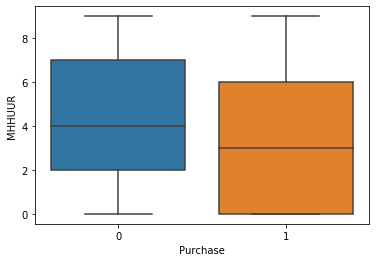

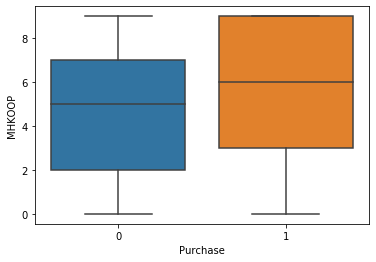

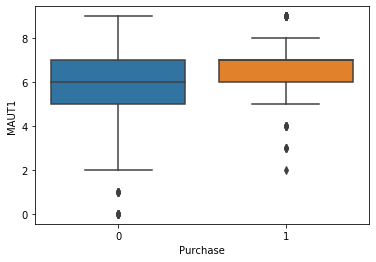

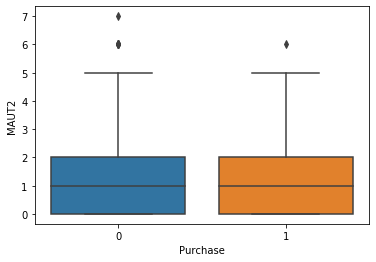

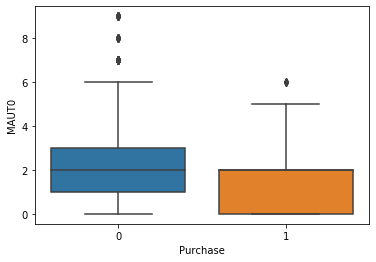

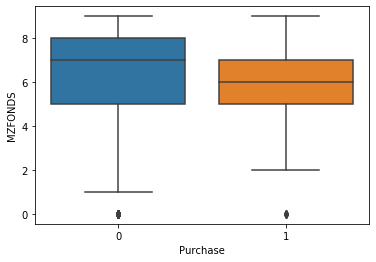

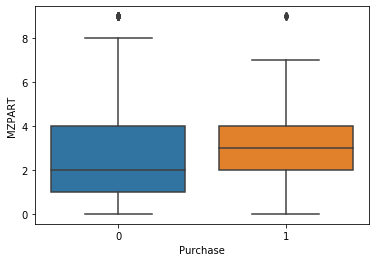

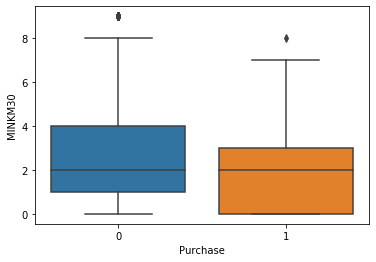

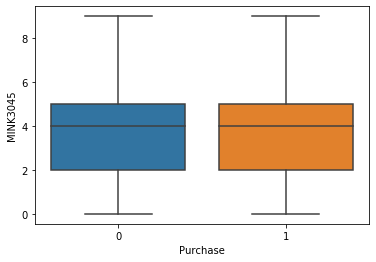

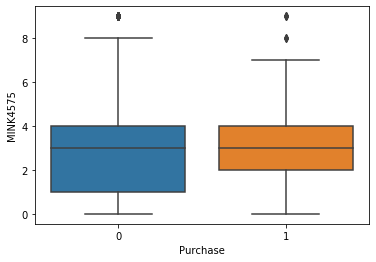

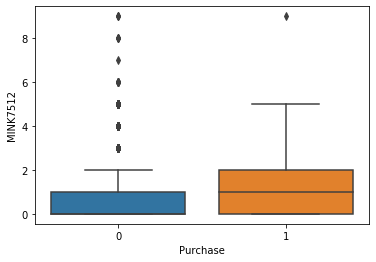

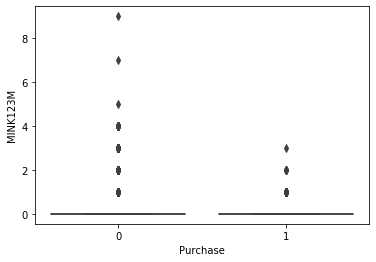

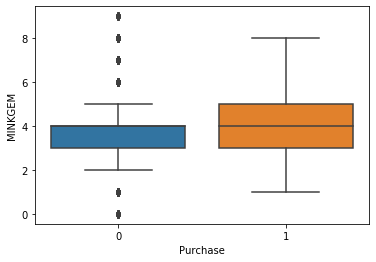

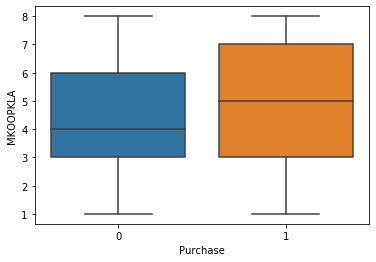

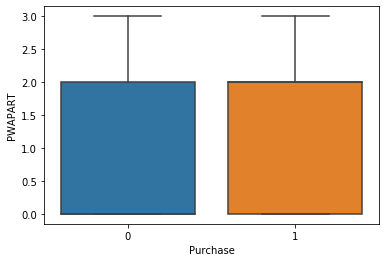

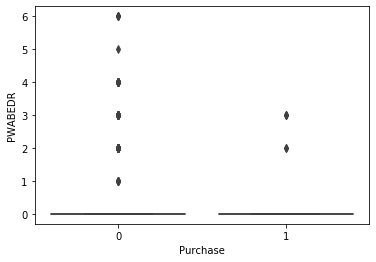

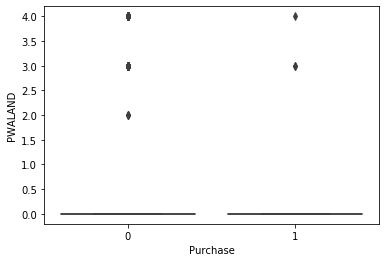

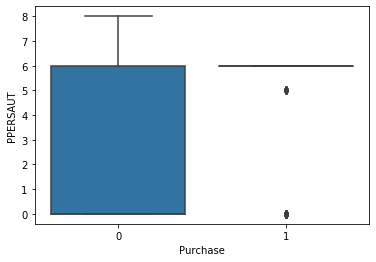

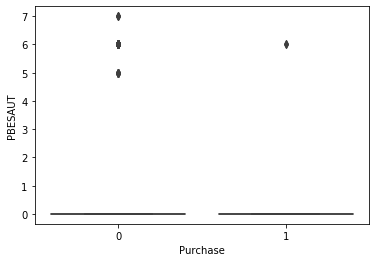

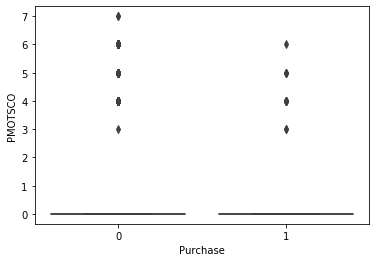

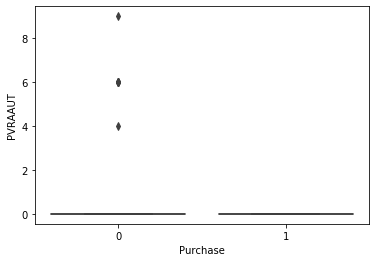

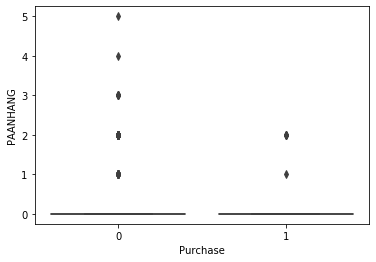

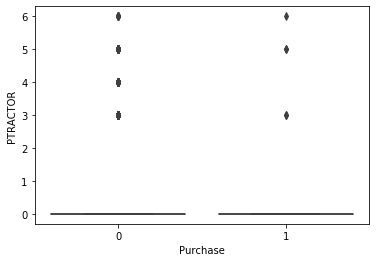

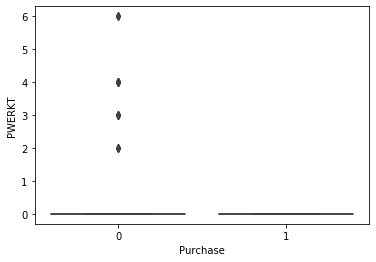

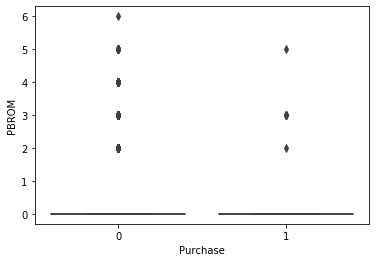

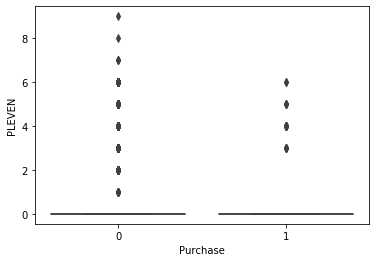

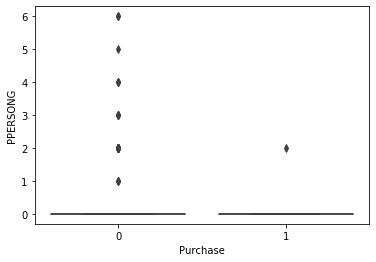

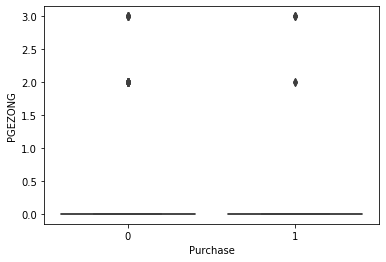

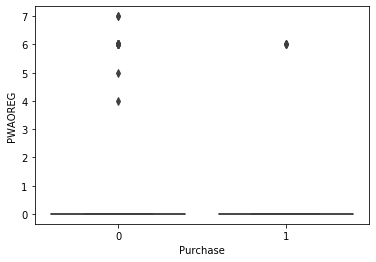

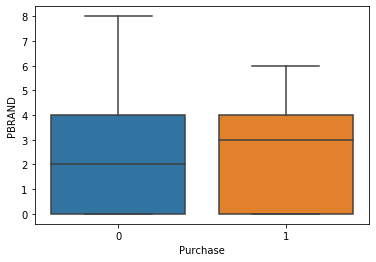

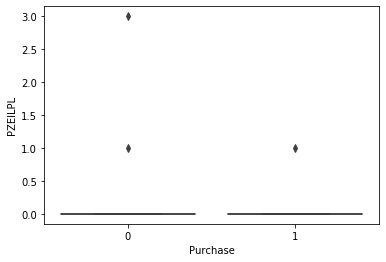

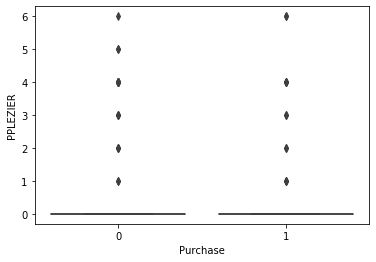

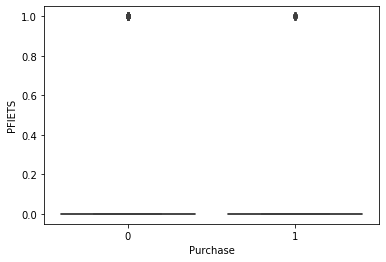

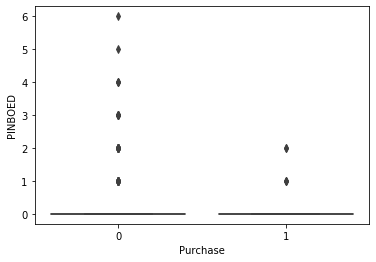

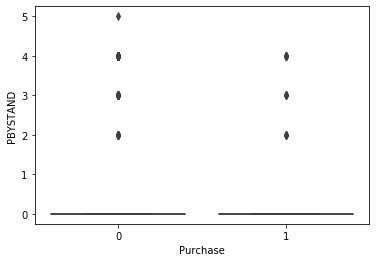

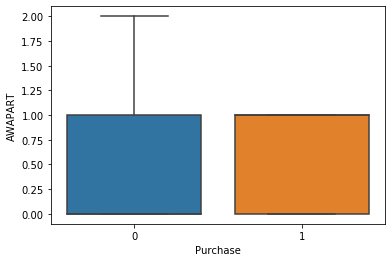

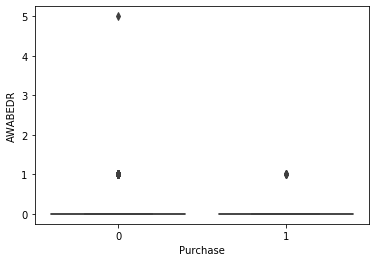

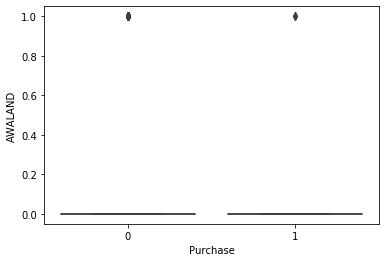

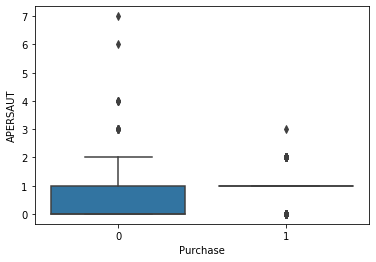

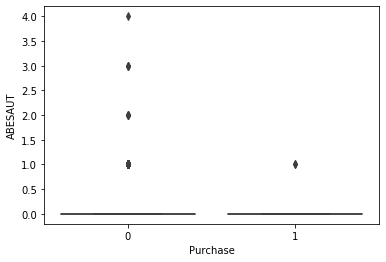

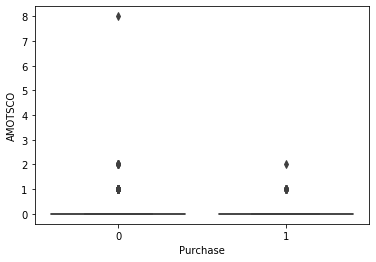

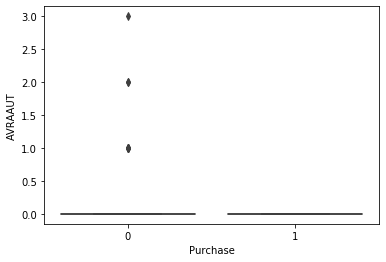

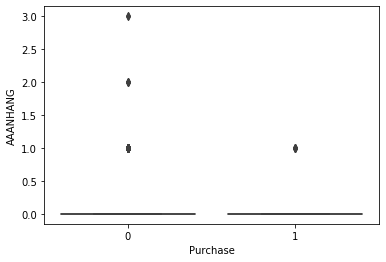

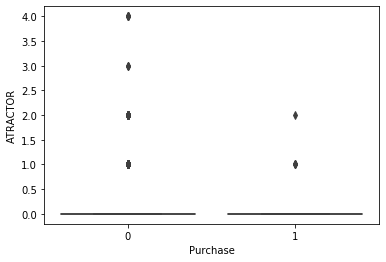

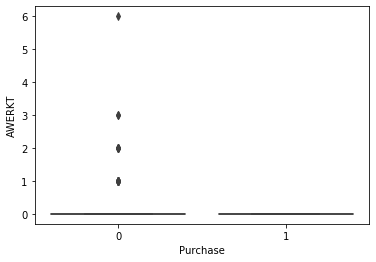

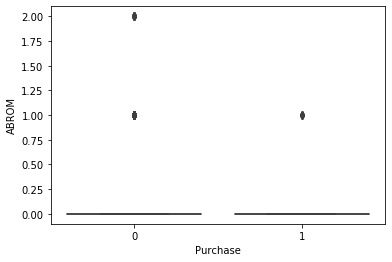

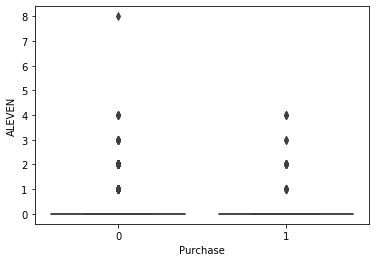

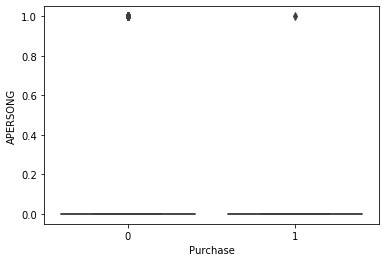

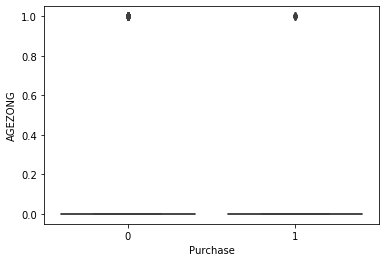

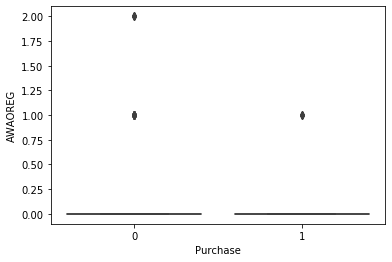

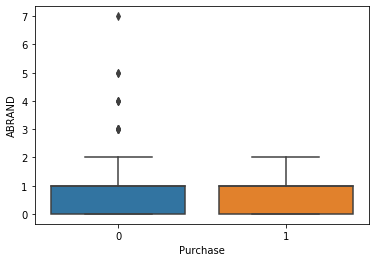

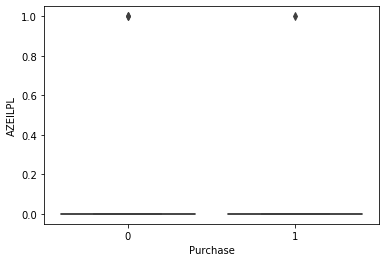

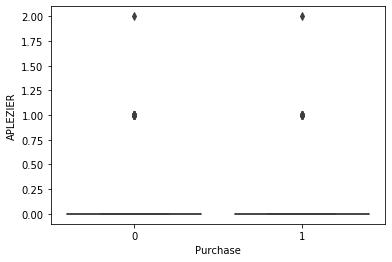

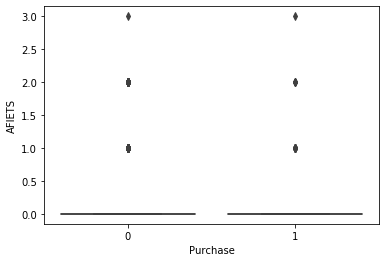

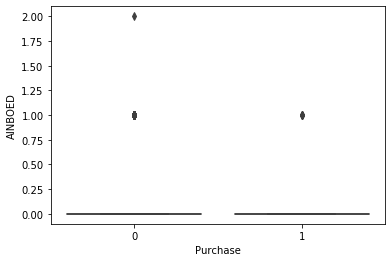

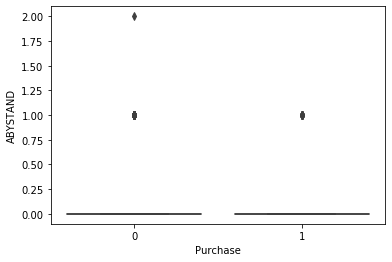

In [46]:
boxplot_boolean_response(df=caravan, features=caravan.columns.values, response='Purchase')

# Carseats

In [30]:
carseats = pd.read_csv('Data/Carseats.csv')
core_info(carseats)

Info about dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0     400 non-null int64
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB
None


Shape
(400, 12)


description: 
       Unnamed: 0       Sales   CompPrice      Income  Advertising  \
count  400.000000  400.000000  400.000000  400.000000   400.000000   
mean   200.500000    7.496325  124.975000   68.657500     6.635000   
std    115.614301    2.824115   15.334512   27.986037     6.650364   
min      1.000000    0.000000   77.000000   21.000000     0.000000   
25%    10

In [31]:
carseats.select_dtypes(include='object').columns.values
# carseats.isnull().sum()

array(['ShelveLoc', 'Urban', 'US'], dtype=object)

In [32]:
# carseats.Urban.unique()
# carseats.ShelveLoc.unique()
carseats.US.unique()

array(['Yes', 'No'], dtype=object)

In [33]:
carseats.drop(columns=['Unnamed: 0'], inplace=True)

In [34]:
carseats.ShelveLoc = carseats.ShelveLoc.factorize()[0]
carseats.Urban = carseats.Urban.factorize()[0]
carseats.US = carseats.US.factorize()[0]

In [35]:
carseats_discrete = ['ShelveLoc', 'Urban', 'US', 'Education']
carseats_continuous = ['Sales', 'CompPrice', 'Income', 'Advertising','Population', 'Price', 'Age']

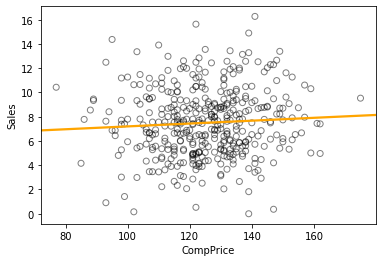

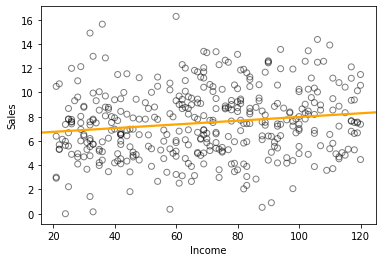

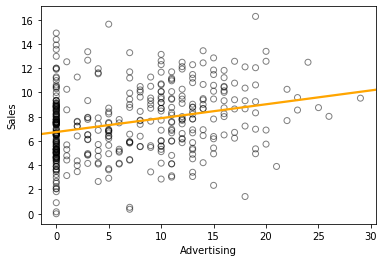

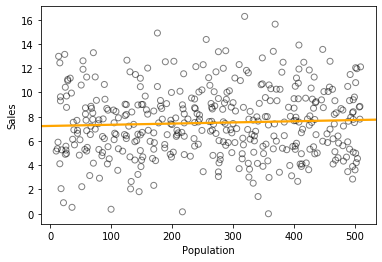

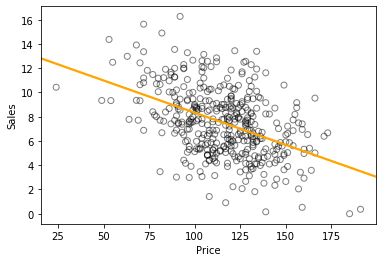

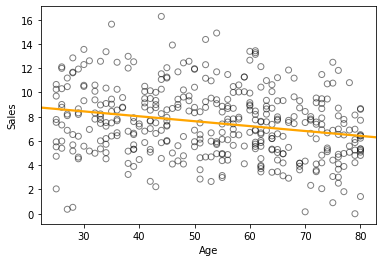

In [36]:
pairwise_plot_with_regline(df=carseats, response='Sales', features=carseats_continuous, degree=1)

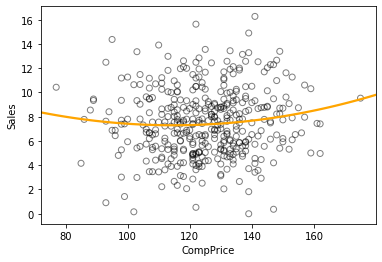

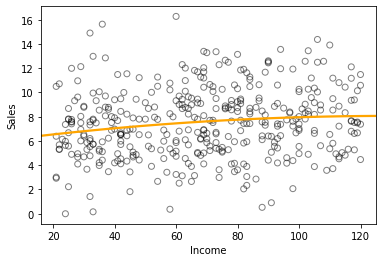

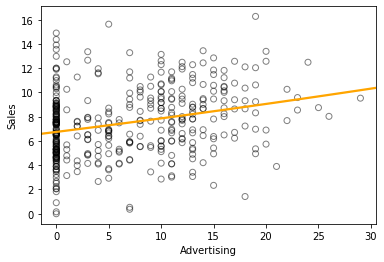

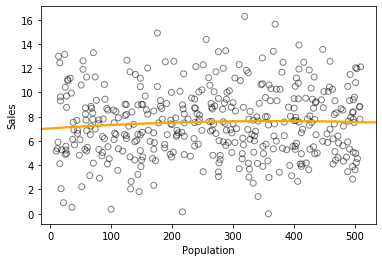

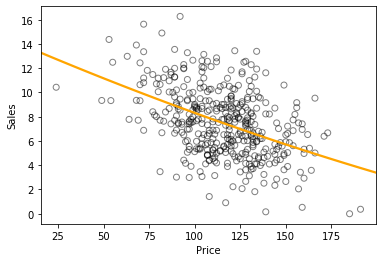

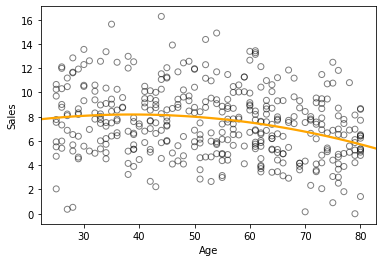

In [37]:
pairwise_plot_with_regline(df=carseats, response='Sales', features=carseats_continuous, degree=2)

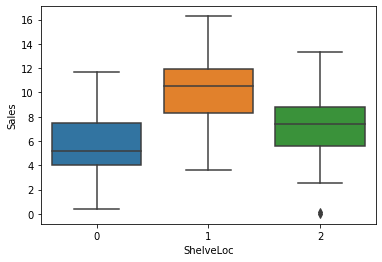

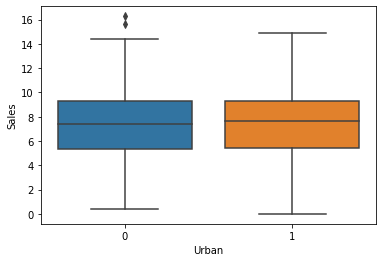

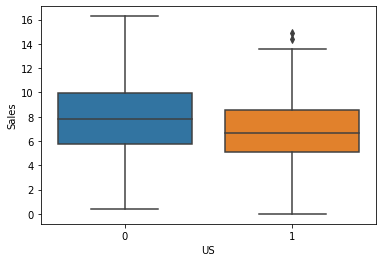

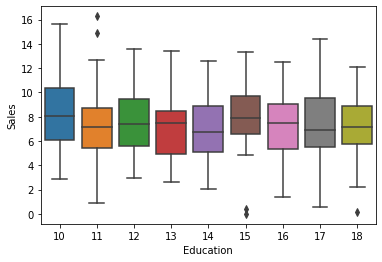

In [38]:
boxplot_categorical(df=carseats, response='Sales', features=carseats_discrete)

# Credit

In [39]:
credit = pd.read_csv('Data/Credit.csv')
core_info(credit)

Info about dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB
None


Shape
(400, 12)


description: 
       Unnamed: 0      Income         Limit      Rating       Cards  \
count  400.000000  400.000000    400.000000  400.000000  400.000000   
mean   200.500000   45.218885   4735.600000  354.940000    2.957500   
std    115.614301   35.244273   2308.198848  154.724143    1.371275   
min      1.000000   10.354000    855.000000   93.000000    1.000000   
25%    100.7500

In [40]:
credit.select_dtypes(include='object').columns.values

array(['Gender', 'Student', 'Married', 'Ethnicity'], dtype=object)

In [41]:
# credit.Gender.unique()
# credit.Student.unique()
# credit.Married.unique()
credit.Ethnicity.unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

In [42]:
credit.drop(columns=['Unnamed: 0'], inplace=True)

In [43]:
# credit.select_dtypes(include='object').nunique()

In [44]:
credit.Student = credit.Student.map({'No':0, 'Yes':1})
# credit.Gender = credit.Gender.map({'Male':0, 'Female':1})
credit.Married = credit.Married.map({'No':0, 'Yes':1})
credit.Ethnicity = credit.Ethnicity.map({'Caucasian':0,'Asian':1 , 'African American':2})

In [45]:
credit.Gender = credit.Gender.factorize()[0]

In [46]:
# credit.dtypes
credit.isnull().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [47]:
credit_continuous = ['Income', 'Limit', 'Rating', 'Age']
credit_discrete = ['Cards', 'Education', 'Gender', 'Student', 'Married', 'Ethnicity']

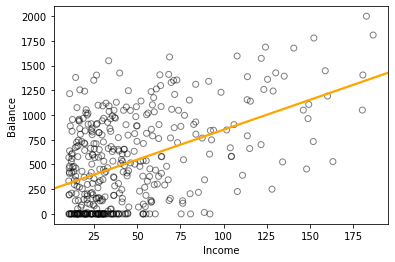

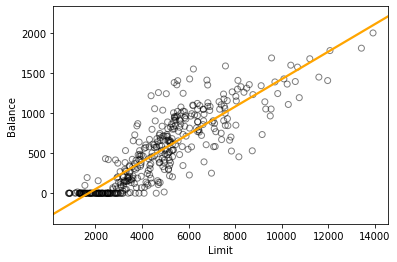

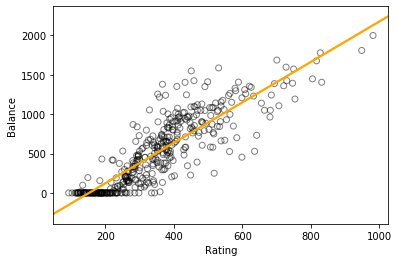

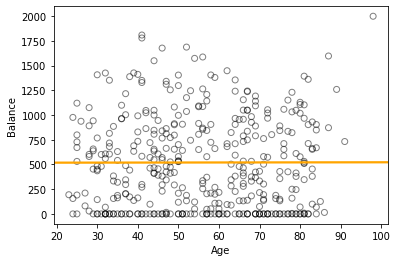

In [48]:
pairwise_plot_with_regline(df=credit, features=credit_continuous, response='Balance', degree=1)

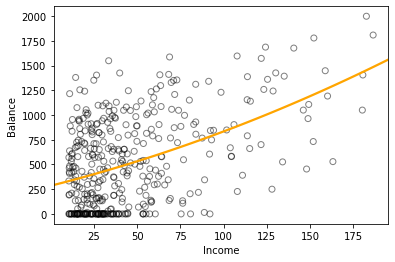

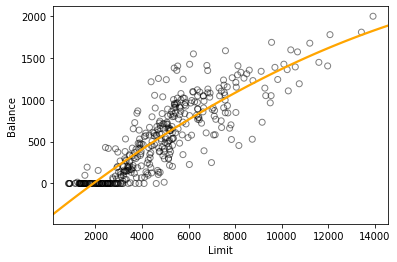

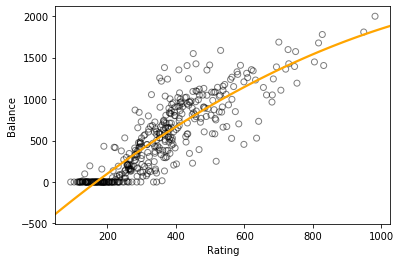

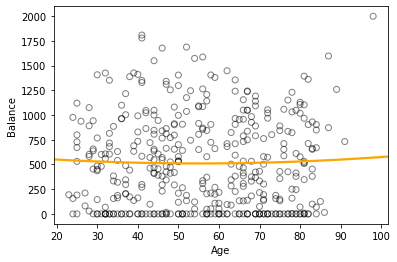

In [49]:
pairwise_plot_with_regline(df=credit, features=credit_continuous, response='Balance', degree=2)

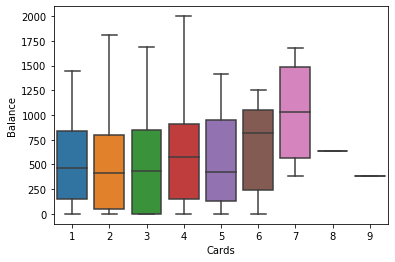

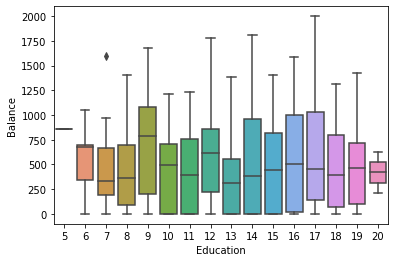

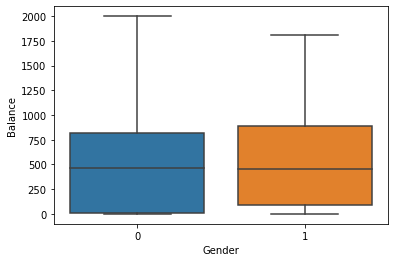

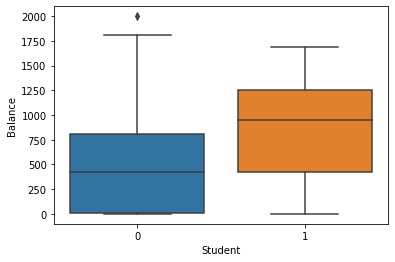

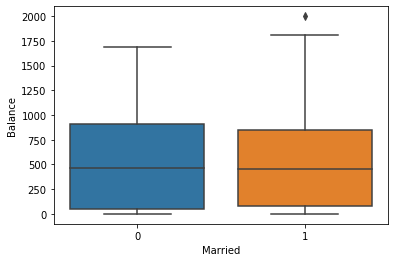

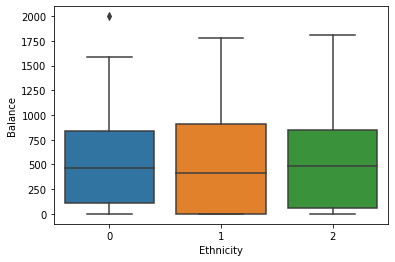

In [50]:
boxplot_categorical(df=credit, features=credit_discrete, response='Balance')

# Default

In [51]:
default = pd.read_excel('Data/Default.xlsx')
core_info(default)

Info about dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
Unnamed: 0    10000 non-null int64
default       10000 non-null object
student       10000 non-null object
balance       10000 non-null float64
income        10000 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB
None


Shape
(10000, 5)


description: 
        Unnamed: 0       balance        income
count  10000.00000  10000.000000  10000.000000
mean    5000.50000    835.374886  33516.981876
std     2886.89568    483.714985  13336.639563
min        1.00000      0.000000    771.967729
25%     2500.75000    481.731105  21340.462903
50%     5000.50000    823.636973  34552.644802
75%     7500.25000   1166.308386  43807.729272
max    10000.00000   2654.322576  73554.233495


Top 2 rows
   Unnamed: 0 default student     balance        income
0           1      No      No  729.526495  44361.625074
1           2      No     Yes  817.1804

In [52]:
default.default = default.default.map({'No':0, 'Yes':1})
default.student = default.student.map({'No':0, 'Yes':1})

In [53]:
default.head()

Unnamed: 0  default  student      balance        income
0           1        0        0   729.526495  44361.625074
1           2        0        1   817.180407  12106.134700
2           3        0        0  1073.549164  31767.138947
3           4        0        0   529.250605  35704.493935
4           5        0        0   785.655883  38463.495879

In [54]:
default_discrete = ['student']
default_continuous = ['balance', 'income']

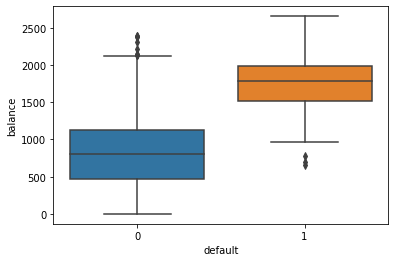

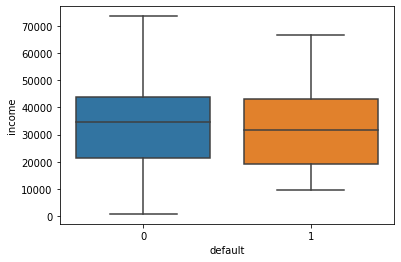

In [55]:
boxplot_boolean_response(df=default, features=default_continuous, response='default')

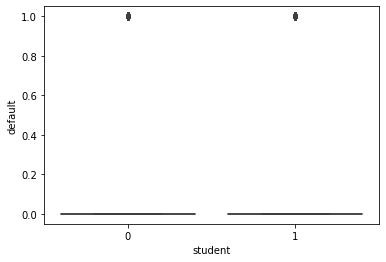

In [56]:
boxplot_categorical(df=default, features=default_discrete, response='default')

In [57]:
# sns.boxplot(x=default.default, y=default.student,data=default)

# Heart

In [58]:
heart = pd.read_csv('Data/Heart.csv').dropna()
core_info(heart)

Info about dataset: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
Unnamed: 0    297 non-null int64
Age           297 non-null int64
Sex           297 non-null int64
ChestPain     297 non-null object
RestBP        297 non-null int64
Chol          297 non-null int64
Fbs           297 non-null int64
RestECG       297 non-null int64
MaxHR         297 non-null int64
ExAng         297 non-null int64
Oldpeak       297 non-null float64
Slope         297 non-null int64
Ca            297 non-null float64
Thal          297 non-null object
AHD           297 non-null object
dtypes: float64(2), int64(10), object(3)
memory usage: 37.1+ KB
None


Shape
(297, 15)


description: 
       Unnamed: 0         Age         Sex      RestBP        Chol         Fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean   150.673401   54.542088    0.676768  131.693603  247.350168    0.144781   
std     87.323283    9.049

In [59]:
heart.select_dtypes(include='object').columns.values

array(['ChestPain', 'Thal', 'AHD'], dtype=object)

In [60]:
# heart.ChestPain.unique()
# heart.Thal.unique()
# heart.AHD.unique()

In [61]:
heart.AHD = heart.AHD.map({'No':0, 'Yes':1})
heart.Thal = heart.Thal.map({'fixed':0, 'normal':1, 'reversable':2})
heart.ChestPain = heart.ChestPain.map({'typical':0, 'asymptomatic':1, 'nonanginal':2, 'nontypical':3})

In [62]:
heart.drop(columns=['Unnamed: 0'], inplace=True)

In [63]:
heart.head()

Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1          0     145   233    1        2    150      0      2.3   
1   67    1          1     160   286    0        2    108      1      1.5   
2   67    1          1     120   229    0        2    129      1      2.6   
3   37    1          2     130   250    0        0    187      0      3.5   
4   41    0          3     130   204    0        2    172      0      1.4   

   Slope   Ca  Thal  AHD  
0      3  0.0     0    0  
1      2  3.0     1    1  
2      2  2.0     2    1  
3      3  0.0     1    0  
4      1  0.0     1    0

In [64]:
heart_discrete = [ 'Thal', 'Slope', 'ExAng', 'RestECG', 'Fbs', 'ChestPain', 'Sex']
heart_continuous = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak', 'Ca']

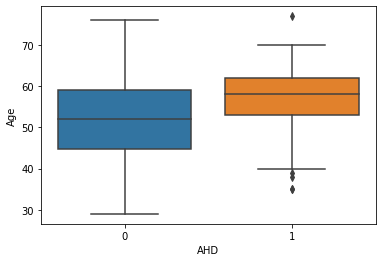

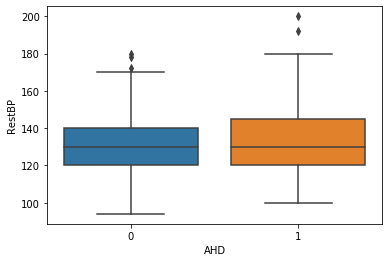

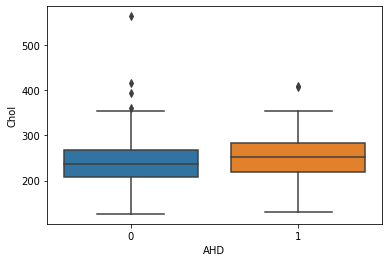

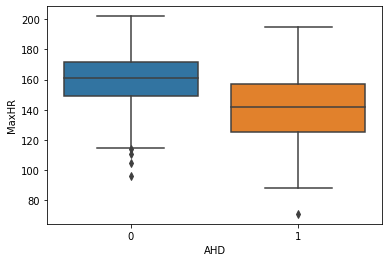

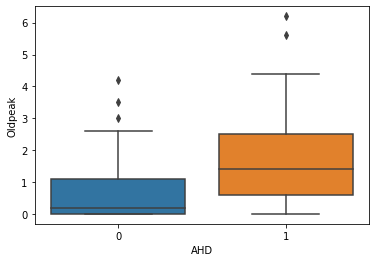

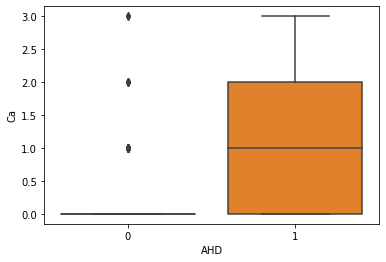

In [65]:
boxplot_boolean_response(df=heart, features=heart_continuous, response='AHD')

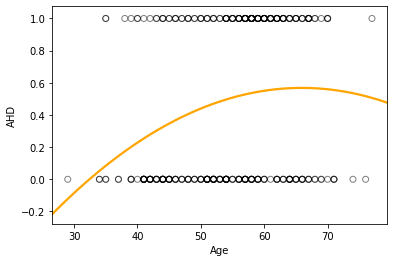

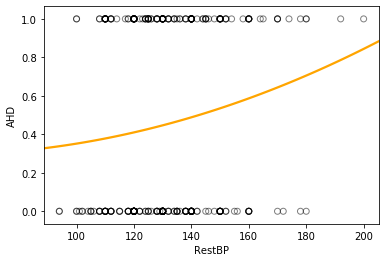

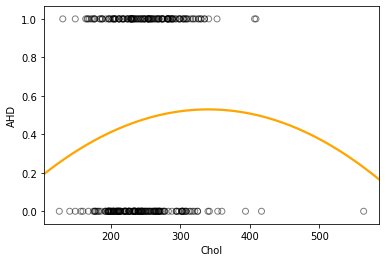

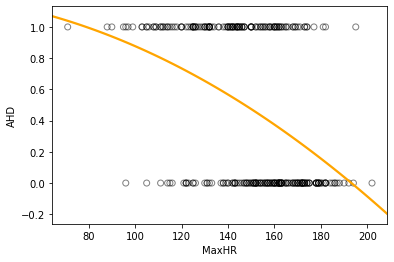

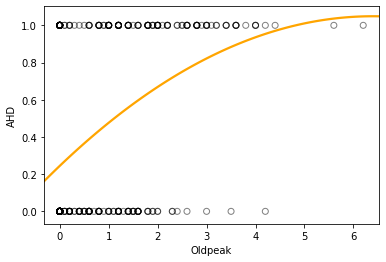

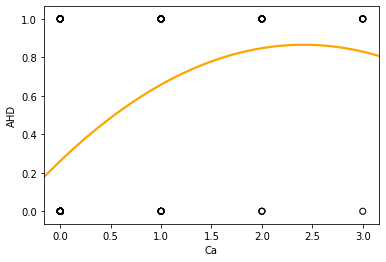

In [66]:
pairwise_plot_with_regline(df=heart, features=heart_continuous, response='AHD', degree=2)

In [67]:
missing_values_table(heart)

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

# Hitters

In [68]:
hitters = pd.read_csv('Data/Hitters.csv', index_col=0).dropna()
hitters.index.name = 'Player'

In [69]:
# core_info(hitters)

In [70]:
hitters.select_dtypes(include='object').columns.values

array(['League', 'Division', 'NewLeague'], dtype=object)

In [71]:
# hitters.League.unique()
# hitters.Division.unique()
# hitters.NewLeague.unique()

In [72]:
# hitters.isnull().sum()

In [73]:
hitters.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  \
Player                                                                          
-Alan Ashby          315    81      7    24   38     39     14    3449    835   
-Alvin Davis         479   130     18    66   72     76      3    1624    457   
-Andre Dawson        496   141     20    65   78     37     11    5628   1575   
-Andres Galarraga    321    87     10    39   42     30      2     396    101   
-Alfredo Griffin     594   169      4    74   51     35     11    4408   1133   

                   CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  \
Player                                                                    
-Alan Ashby            69    321   414     375      N        W      632   
-Alvin Davis           63    224   266     263      A        W      880   
-Andre Dawson         225    828   838     354      N        E      200   
-Andres Galarraga      12     48    46      33      N        E      805   
-Alfredo Griffin       19    501   336     194      A        W      282   

                   Assists  Errors  Salary NewLeague  
Player                                                
-Alan Ashby             43      10   475.0         N  
-Alvin Davis            82      14   480.0         A  
-Andre Dawson           11       3   500.0         N  
-Andres Galarraga       40       4    91.5         N  
-Alfredo Griffin       421      25   750.0         A

In [74]:
hitters = pd.concat([hitters, pd.get_dummies(hitters[['League', 'Division', 'NewLeague']])], axis=1)

In [75]:
hitters.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague', 'League_A',
       'League_N', 'Division_E', 'Division_W', 'NewLeague_A', 'NewLeague_N'],
      dtype='object')

In [76]:
hitters.drop(columns=['League', 'Division', 'NewLeague'], inplace=True)

In [77]:
hitters.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary', 'League_A', 'League_N', 'Division_E', 'Division_W',
       'NewLeague_A', 'NewLeague_N'],
      dtype='object')

In [78]:
hitters_continuous = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors']
hitters_discrete = ['League_A', 'League_N', 'Division_E', 'Division_W','NewLeague_A', 'NewLeague_N']

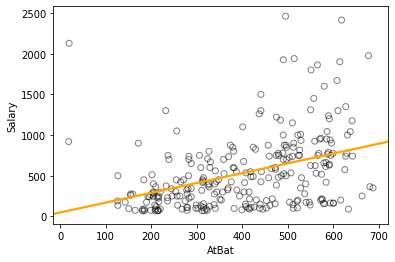

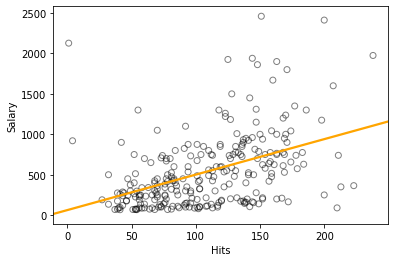

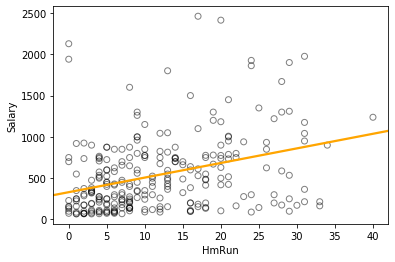

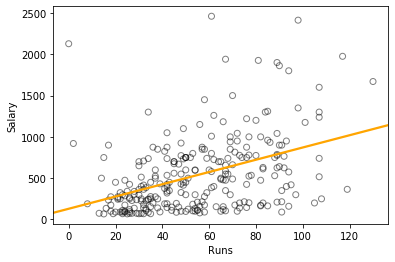

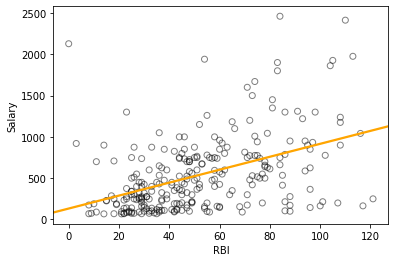

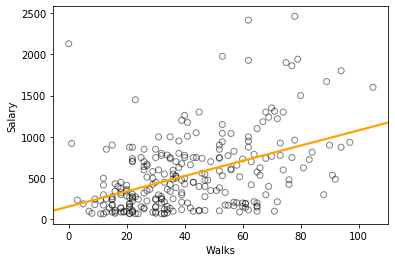

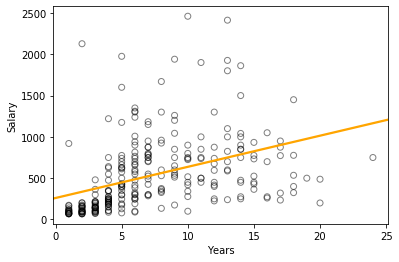

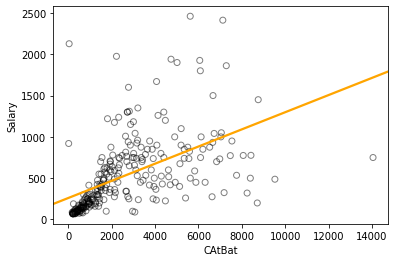

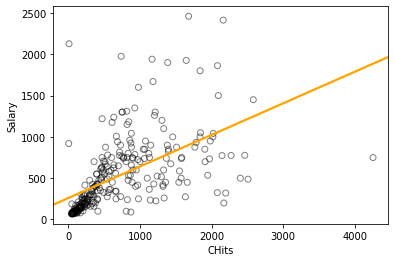

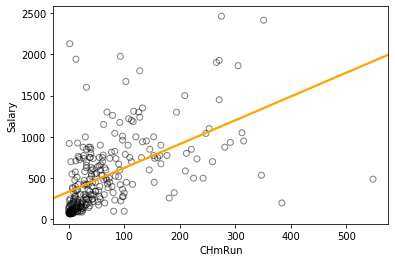

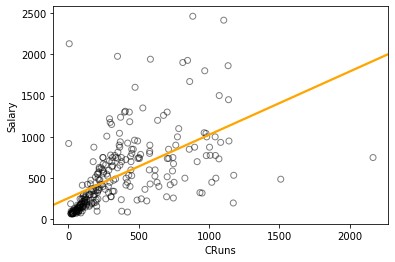

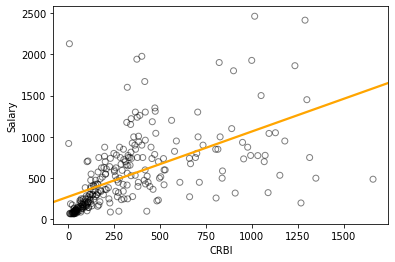

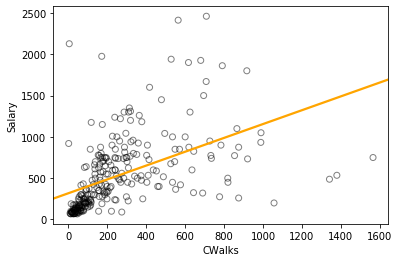

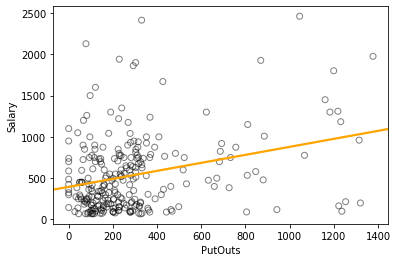

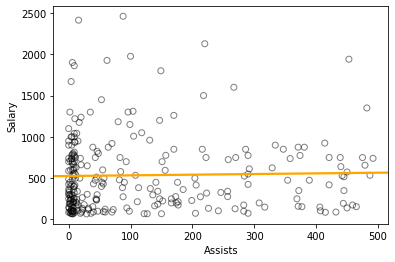

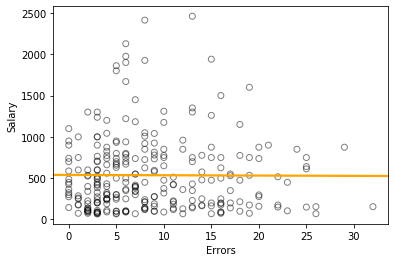

In [79]:
pairwise_plot_with_regline(df=hitters, features=hitters_continuous, response='Salary', degree=1)

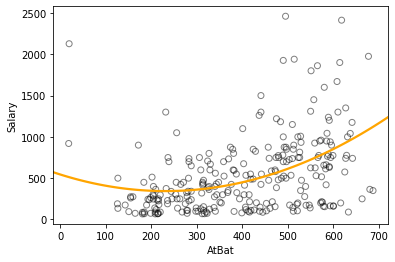

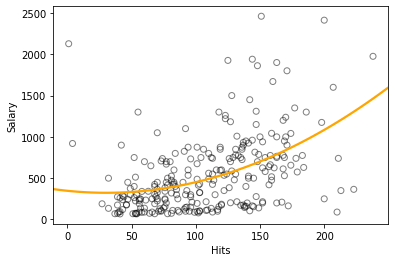

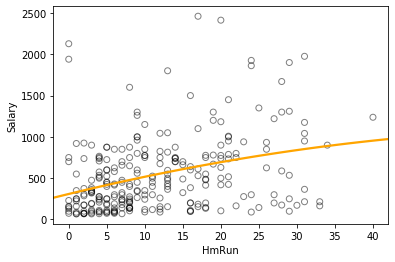

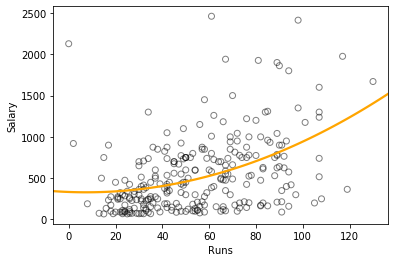

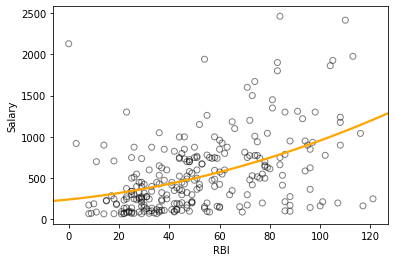

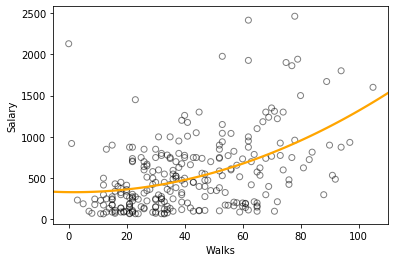

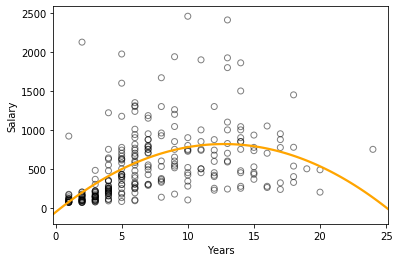

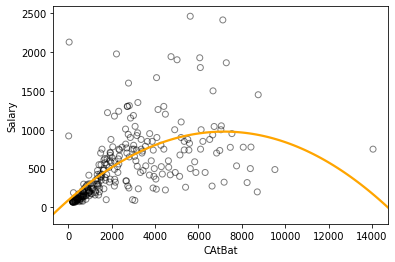

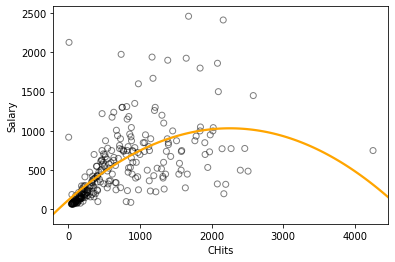

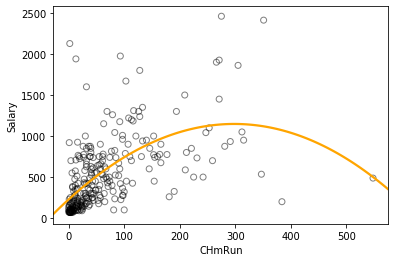

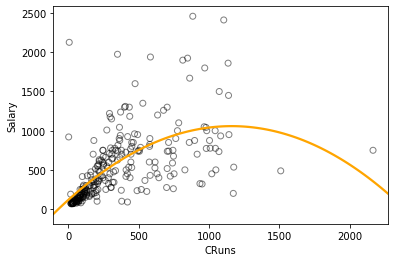

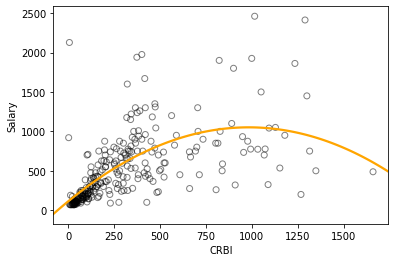

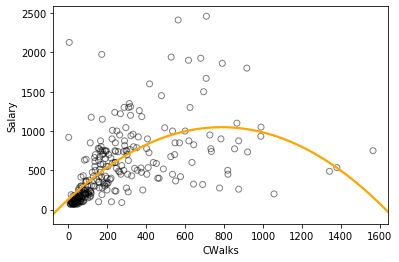

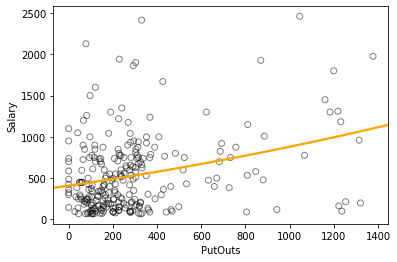

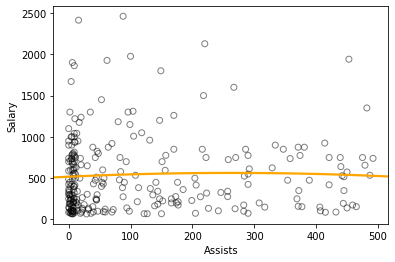

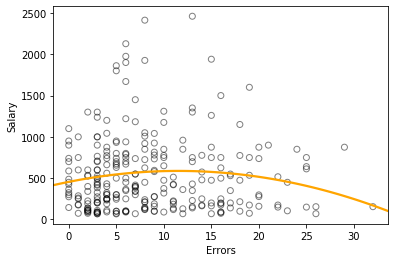

In [80]:
pairwise_plot_with_regline(df=hitters, features=hitters_continuous, response='Salary', degree=2)

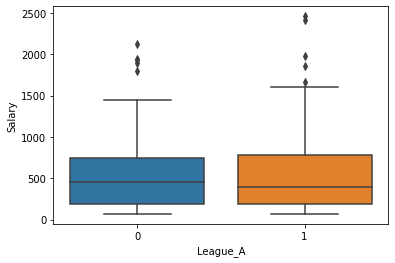

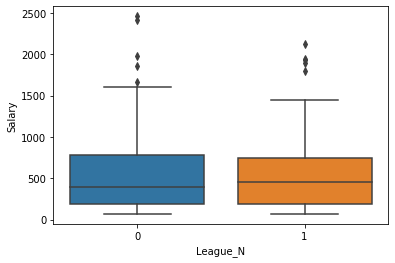

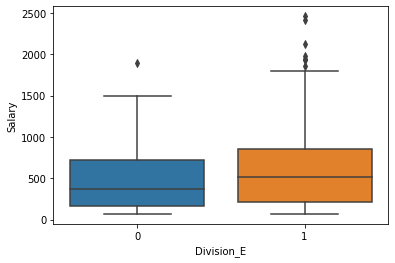

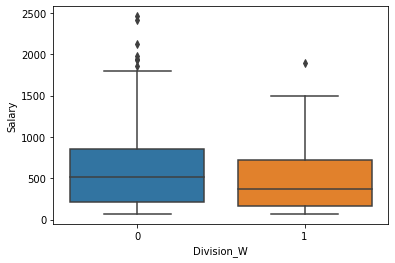

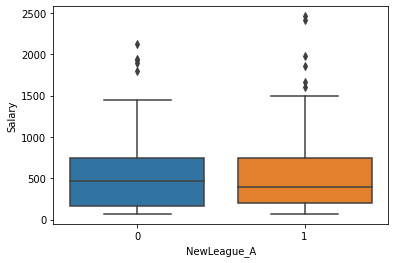

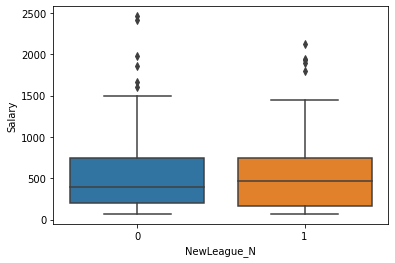

In [81]:
boxplot_categorical(df=hitters, features=hitters_discrete, response='Salary')

In [82]:
missing_values_table(hitters)

Your selected dataframe has 23 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

# Khan

In [83]:
df = pd.read_csv('Data/Khan_xtrain.csv').drop('Unnamed: 0', axis=1)

In [84]:
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0  0.773344 -2.438405 -0.482562 -2.721135 -1.217058  0.827809  1.342604   
1 -0.078178 -2.415754  0.412772 -2.825146 -0.626236  0.054488  1.429498   
2 -0.084469 -1.649739 -0.241307 -2.875286 -0.889405 -0.027474  1.159300   
3  0.965614 -2.380547  0.625297 -1.741256 -0.845366  0.949687  1.093801   
4  0.075664 -1.728785  0.852626  0.272695 -1.841370  0.327936  1.251219   

         V8        V9       V10  ...     V2299     V2300     V2301     V2302  \
0  0.057042  0.133569  0.565427  ... -0.238511 -0.027474 -1.660205  0.588231   
1 -0.120249  0.456792  0.159053  ... -0.657394 -0.246284 -0.836325 -0.571284   
2  0.015676  0.191942  0.496585  ... -0.696352  0.024985 -1.059872 -0.403767   
3  0.819736 -0.284620  0.994732  ...  0.259746  0.357115 -1.893128  0.255107   
4  0.771450  0.030917  0.278313  ... -0.200404  0.061753 -2.273998 -0.039365   

      V2303     V2304     V2305     V2306     V2307     V2308  
0 -0.463624 -3.952845 -5.496768 -1.414282 -0.647600 -1.763172  
1  0.034788 -2.478130 -3.661264 -1.093923 -1.209320 -0.824395  
2 -0.678653 -2.939352 -2.736450 -1.965399 -0.805868 -1.139434  
3  0.163309 -1.021929 -2.077843 -1.127629  0.331531 -2.179483  
4  0.368801 -2.566551 -1.675044 -1.082050 -0.965218 -1.836966  

[5 rows x 2308 columns]

# NCI60

In [85]:
df2 = pd.read_csv('Data/NCI60_X.csv').drop('Unnamed: 0', axis=1)
core_info(df2)

Info about dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 1 to 6830
dtypes: float64(6830)
memory usage: 3.3 MB
None


Shape
(64, 6830)


description: 
               1          2          3          4          5          6  \
count  64.000000  64.000000  64.000000  64.000000  64.000000  64.000000   
mean   -0.019063  -0.027813  -0.019923  -0.328673   0.026093   0.006718   
std     0.441332   0.757433   0.433306   1.091905   0.485073   0.350432   
min    -1.060000  -2.190000  -1.710000  -2.610000  -0.825000  -0.700000   
25%    -0.372500  -0.404985  -0.192485  -1.322500  -0.225000  -0.156250   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     0.310005   0.352500   0.162490   0.692500   0.210000   0.184995   
max     0.940000   2.240000   1.150000   1.500000   1.715000   1.160000   

               7          8          9         10  ...       6821       6822  \
count  64.000000  64.000000  64.00000

In [86]:
df2.head()

1         2         3         4         5             6         7  \
0  0.300000  1.180000  0.550000  1.140000 -0.265000 -7.000000e-02  0.350000   
1  0.679961  1.289961  0.169961  0.379961  0.464961  5.799610e-01  0.699961   
2  0.940000 -0.040000 -0.170000 -0.040000 -0.605000  0.000000e+00  0.090000   
3  0.280000 -0.310000  0.680000 -0.810000  0.625000 -1.387779e-17  0.170000   
4  0.485000 -0.465000  0.395000  0.905000  0.200000 -5.000000e-03  0.085000   

          8         9        10  ...      6821      6822      6823      6824  \
0 -0.315000 -0.450000 -0.654981  ... -0.990019  0.000000  0.030000 -0.175000   
1  0.724961 -0.040039 -0.285020  ... -0.270058 -0.300039 -0.250039 -0.535039   
2  0.645000  0.430000  0.475019  ...  0.319981  0.120000 -0.740000 -0.595000   
3  0.245000  0.020000  0.095019  ... -1.240020 -0.110000 -0.160000  0.095000   
4  0.110000  0.235000  1.490019  ...  0.554980 -0.775000 -0.515000 -0.320000   

       6825      6826      6827      6828      6829      6830  
0  0.629981 -0.030000  0.000000  0.280000 -0.340000 -1.930000  
1  0.109941 -0.860039 -1.250049 -0.770039 -0.390039 -2.000039  
2 -0.270020 -0.150000  0.000000 -0.120000 -0.410000  0.000000  
3 -0.350020 -0.300000 -1.150010  1.090000 -0.260000 -1.100000  
4  0.634980  0.605000  0.000000  0.745000  0.425000  0.145000  

[5 rows x 6830 columns]

# Smarket

In [87]:
smarket = pd.read_csv('Data/Smarket.csv').drop('Unnamed: 0', axis=1)
core_info(smarket)

Info about dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB
None


Shape
(1250, 9)


description: 
              Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25%    2002.000000    -0.639500    -0.639500    -0.640000    -0.640000   
50%    2003.000

In [88]:
smarket.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up

In [89]:
smarket.Direction.unique()

array(['Up', 'Down'], dtype=object)

In [90]:
smarket.Direction = smarket.Direction.map({'Up':1, 'Down':0})

In [91]:
smarket.columns.values

array(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'], dtype=object)

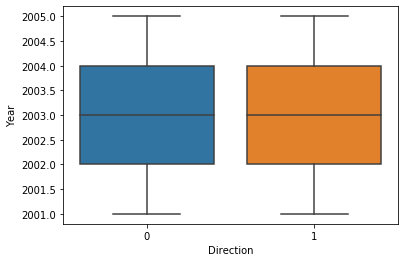

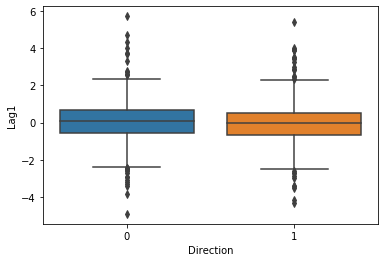

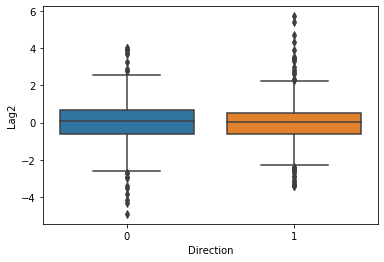

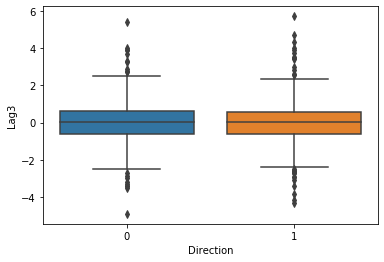

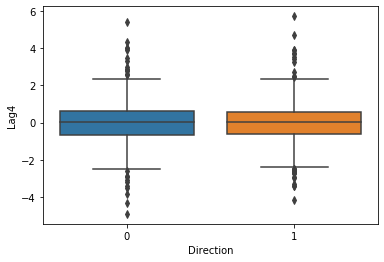

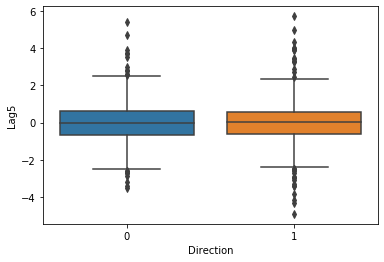

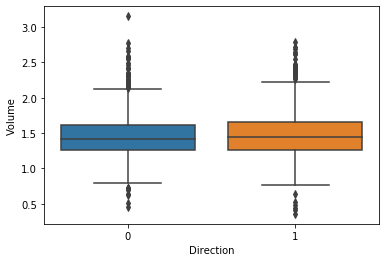

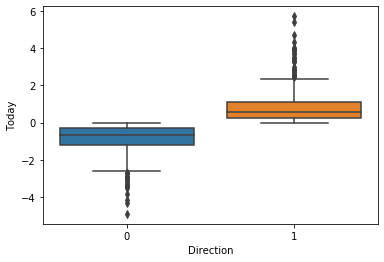

In [92]:
boxplot_boolean_response(df=smarket, features=['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today'], response='Direction')

In [93]:
missing_values_table(df=smarket)

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

# USArrests

In [94]:
usarrest = pd.read_csv('Data/USArrests.csv', index_col=0)#.drop('Unnamed: 0', axis=1)

In [95]:
core_info(usarrest)

Info about dataset: 
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None


Shape
(50, 4)


description: 
         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


Top 2 rows
         Murder  Assault  UrbanPop  Rape
Alabama    13.2      236        58  21.2
Alaska     10.0      263        48  44.5


In [96]:
missing_values_table(usarrest)

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

# Wage

In [97]:
wage = pd.read_csv('Data/Wage.csv')

In [98]:
core_info(wage)

Info about dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
Unnamed: 0    3000 non-null int64
year          3000 non-null int64
age           3000 non-null int64
sex           3000 non-null object
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(3), object(8)
memory usage: 304.8+ KB
None


Shape
(3000, 13)


description: 
          Unnamed: 0         year          age      logwage         wage
count    3000.000000  3000.000000  3000.000000  3000.000000  3000.000000
mean   218883.373000  2005.791000    42.414667     4.653905   111.703608
std    145654.072587     2.026167    11.542406     0.351753    41.728595
min      7373.000000  

In [99]:
for col in wage.select_dtypes(include='object').columns.values:
    print(col)
    print('number of unique elements: {}'.format(wage[col].nunique()))
    print(wage[col].unique())
    print('\n')

sex
number of unique elements: 1
['1. Male']


maritl
number of unique elements: 5
['1. Never Married' '2. Married' '4. Divorced' '3. Widowed' '5. Separated']


race
number of unique elements: 4
['1. White' '3. Asian' '4. Other' '2. Black']


education
number of unique elements: 5
['1. < HS Grad' '4. College Grad' '3. Some College' '2. HS Grad'
 '5. Advanced Degree']


region
number of unique elements: 1
['2. Middle Atlantic']


jobclass
number of unique elements: 2
['1. Industrial' '2. Information']


health
number of unique elements: 2
['1. <=Good' '2. >=Very Good']


health_ins
number of unique elements: 2
['2. No' '1. Yes']


